In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os
from scipy.optimize import curve_fit


In [3]:
k3Speedup = [[0.999401675, 0.944350759, 1.024596464, 1.18488529
],[0.890243902, 0.908344733, 0.904008992, 0.87680345
], [0.681451613, 0.82962963, 0.698038152, 0.748596112
], [0.660714286, 0.632297195, 0.625547691, 0.544178314
]]
k8Speedup = [[0.89,	0.926798218, 1.028967386, 0.944568759
],[0.865168539, 0.837905237, 0.944080168, 0.987781657
], [0.805555556,0.632845188, 0.714446953, 0.847086289
], [0.492307692, 0.548440066, 0.423582006, 0.439030849
]]

k15Speedup = [[1.050420168, 0.97915581, 0.97055791, 1.009454054
],[0.936936937,	0.801285798, 0.910926204, 0.955554182
], [0.774193548, 0.863267671, 0.745451204, 0.758515764
], [0.62962963, 0.625178827, 0.54568921, 0.5135704
]]
for i in range(len(k8Speedup)):
    k3Speedup[i] = [1/item for item in k3Speedup[i]]
    k8Speedup[i] = [1/item for item in k8Speedup[i]]
    k15Speedup[i] = [1/item for item in k15Speedup[i]]
        

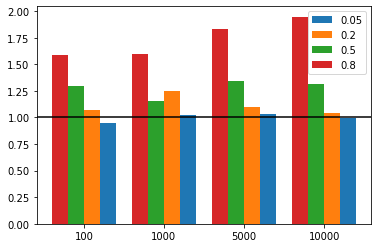

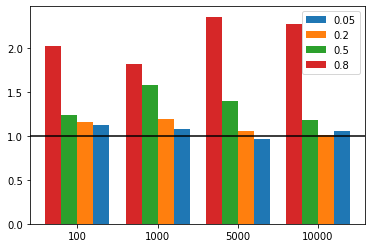

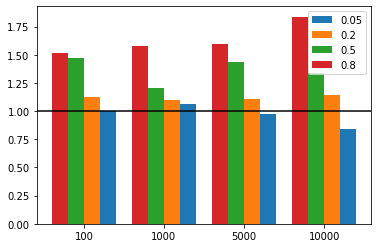

In [4]:
fractions = [0.05, 0.2,0.5,0.8]
#nodes = ['100', '1000', '5000', '10000']
nodes = [100, 1000, 5000, 10000]


X_axis = np.arange(len(nodes))
def plotSpeedup(input):
    for i in range(len(fractions)):
        plt.bar(X_axis + 0.3-0.2*i, input[i],0.2, label=fractions[i])
        
    plt.axhline(y=1, color='#000000', linestyle='-')
    plt.xticks(X_axis, nodes) 
    plt.legend()
    plt.show()
plotSpeedup(k15Speedup)
plotSpeedup(k8Speedup)
plotSpeedup(k3Speedup)

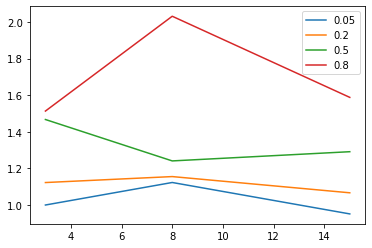

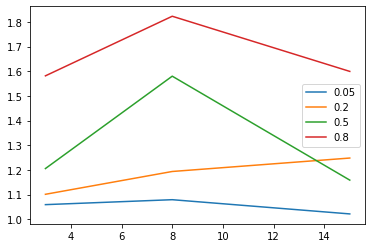

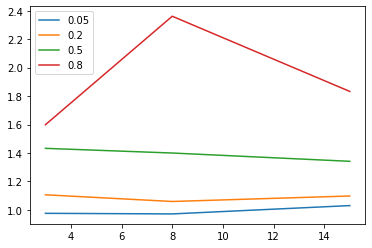

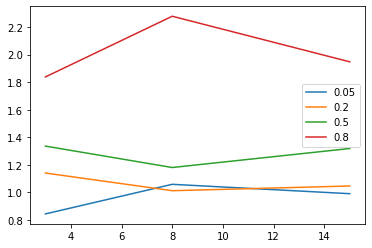

In [5]:
def plotAverageK(k3, k8, k15, fractionI):
    for i in range(len(fractions)):
        y = [k3[i][fractionI], k8[i][fractionI], k15[i][fractionI]]
        plt.plot([3,8,15],y, label = fractions[i] )
    plt.legend()
    plt.show()

plotAverageK(k3Speedup, k8Speedup, k15Speedup,0)
plotAverageK(k3Speedup, k8Speedup, k15Speedup,1)
plotAverageK(k3Speedup, k8Speedup, k15Speedup,2)
plotAverageK(k3Speedup, k8Speedup, k15Speedup,3)
    


[ 3.81084355 14.32476302 -6.7110462  15.29670057]
[-2.22338948  3.60639474]
[-3.06464562  3.48979649]


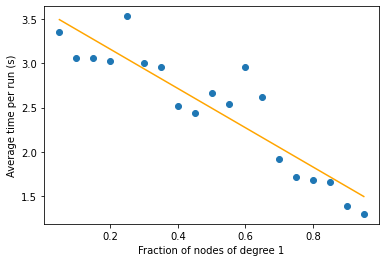

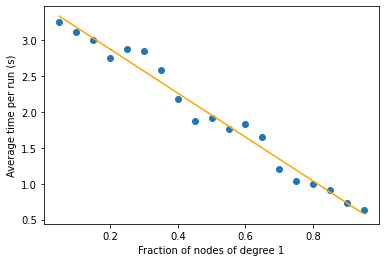

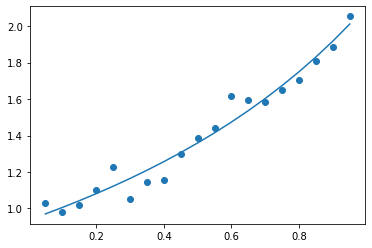

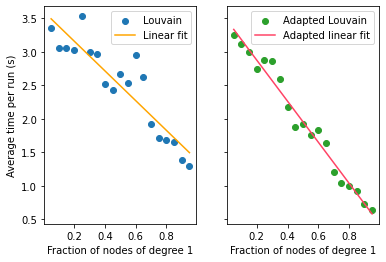

In [6]:
def objective(x, a, b,c, d):
	#return a *x*np.log(x)+ b / (c*x*np.log(x)+ d*x + e)
	return (a*x+b) / (c*x+d)
def standardObjective(x,a,b):
	return a*x+b

def adaptedObjective(x,c,d,e):
	return (c*x*np.log(x)+ d*x + e)
values = [3.3522,3.257,-0.0372,-0.0522,3.0636,3.1181,-0.0157,-0.0327,3.0616,
3.0033,-0.0207,-0.0409,3.0312,2.7508,-0.2401,-0.2474,
3.5336,2.8784,-0.0069,-0.0313,3.0019,2.8574,-0.0246,-0.0768,2.9632,
2.5904,-0.1829,-0.1939,2.5183,2.1811,-0.2677,-0.2791,
2.4382,1.8771,-0.4109,-0.4205,2.665,1.9223,-0.292,-0.3057,
2.5394,1.7639,-0.2796,-0.291,2.9607,1.831,-0.2971,-0.313,
2.6255,1.6456,-0.5019,-0.5186,1.9172,1.2094,-0.3933,-0.404,
1.7096,1.0376,-0.638,-0.6519,1.6859,0.9889,-0.2939,-0.3121,
1.6537,0.9153,-0.3311,-0.3429,1.3815,0.733,-0.7239,-0.7374,
1.297,0.6314,-0.7973,-0.8088]

adapted = values[1::4]
standard = values[0::4]
y = np.array(standard) / np.array(adapted)
x = np.arange(0.05,1, 0.05)

plt.xlabel("Fraction of nodes of degree 1")
plt.ylabel("Average time per run (s)")

poptStandard,_ = curve_fit(standardObjective, x,standard)
poptAdapted,_= curve_fit(standardObjective, x,adapted)
p0 = [-3.06,3.4, -2.2, 3.6]
popt, _ = curve_fit(objective, x,y,p0)

print(popt)
print(poptStandard)
print(poptAdapted)
plt.scatter(x, standard)
yfitstandard = standardObjective(x, *poptStandard)
plt.plot(x,yfitstandard, color = 'orange')
plt.savefig("standard.pdf")
plt.show()
plt.xlabel("Fraction of nodes of degree 1")
plt.ylabel("Average time per run (s)")
plt.scatter(x, adapted)
yfitAdapted = standardObjective(x, *poptAdapted)
plt.plot(x,yfitAdapted, color = "orange")
plt.savefig("adapted.pdf")
plt.show()
yfit = objective(x,*popt)
plt.plot(x,yfit)
plt.scatter(x,y)
plt.show()
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
ax1.scatter(x,standard, label = "Louvain")
ax1.plot(x,yfitstandard, color = 'orange', label = "Linear fit")
ax2.scatter(x, adapted, label = "Adapted Louvain", color = "#2ca02c")
ax1.set_xlabel("Fraction of nodes of degree 1")
ax2.set_xlabel("Fraction of nodes of degree 1")
ax1.set_ylabel("Average time per run (s)")
ax2.plot(x,yfitAdapted, color = "#FF4365", label = "Adapted linear fit")
ax1.legend()
ax2.legend()
plt.savefig("AdaptedStandardFit.pdf")

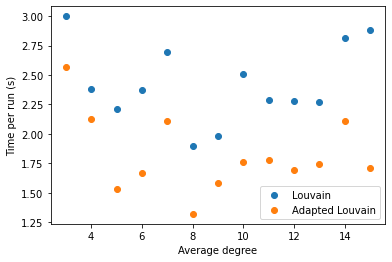

In [7]:
valuesAverageK = [3.00,2.572,2.379,2.128,2.209,1.536,2.37,1.67,2.695,2.106,1.90,1.32,1.98,1.58,2.512,1.76,2.284,1.775,2.283,1.696,2.27,1.74,2.812,2.11,2.88,1.714]

standard = valuesAverageK[0::2]
adapted = valuesAverageK[1::2]
x= np.arange(3,16,1)
plt.scatter(x, standard, label= "Louvain")
plt.scatter(x, adapted, label = "Adapted Louvain")
plt.ylabel("Time per run (s)")
plt.xlabel("Average degree")
plt.legend()
plt.savefig("AverageDegreePlot.pdf")

In [ ]:
import os
dir= os.getcwd()
print(dir)
dfsize = pd.read_csv(dir + "\\..\\output2.csv", delimiter=";", decimal=",")
standard = dfsize.iloc[0][1:].values.flatten().tolist()
adapted = dfsize.iloc[1][1:].values.flatten().tolist()
x = [100, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
standard = np.array(standard)
adapted = np.array(adapted)
y = standard/adapted
fig, (ax1, ax2) = plt.subplots(1,2, sharey=False)
print(standard)
print(adapted)
ax1.scatter(x, standard, label = "Louvain")
ax1.scatter(x, adapted, label = "Adapted Louvain")
ax1.set_xlabel("Number of nodes")
ax1.set_ylabel("Time per run (s)")
ax2.scatter(x,y, color = "#2ca02c")

ax2.set_xlabel("Number of nodes")
ax2.set_ylabel("Speedup")
ax1.legend()
plt.tight_layout()
plt.savefig("SizePlot.pdf")